## Data Importation 

In [1]:
data<-read.csv("data_visco.csv")
data_lasso <- read.csv("data_lasso.csv")
data_AIC <- read.csv("data_AIC.csv")


In [2]:
dim(data_lasso)
dim(data_AIC)

[1] 7247   29

[1] 7247   20

In [3]:
nettoyer = function(x){
    x[x < 0] = 0
    return(x)
}

In [4]:
data_lasso = nettoyer(data_lasso)

In [30]:
data_lasso_log = data.frame(data_lasso)
vis_log = log(data_lasso_log[1])
data_lasso_log[,1] = vis_log

In [32]:
data_AIC_log = data.frame(data_AIC)
vis_log = log(data_lasso_log[1])
data_AIC_log[,1] = vis_log

In [34]:
dim(data_AIC_log)

[1] 7247   20

Pour rendre la distribution de la viscocité gaussienne, on utilise log(viscocité)

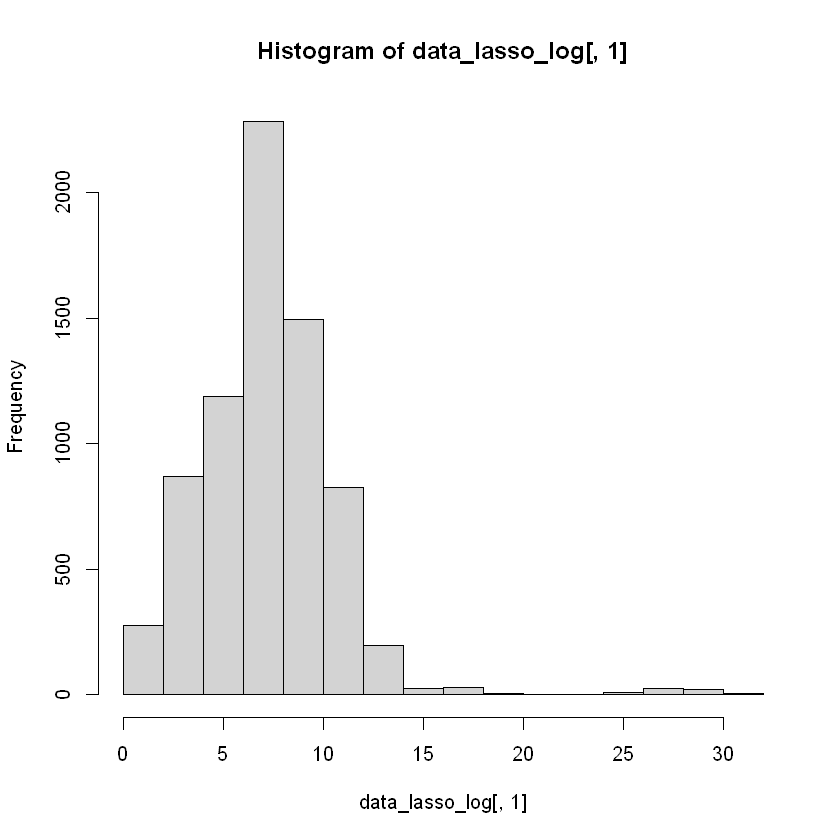

In [31]:
hist(data_lasso_log[,1])

In [23]:
data_lasso_log

vis,X__3,X__4,X__8,X__10,X__17,X__18,X__29,X__30,X__43,...,X__84,X__86,X__106,X__109,X__113,X__115,X__117,X__133,X__138,autres
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7.795647,0,9.42,8.52,0,0,0.00,0.00,0,0,...,0,0,0,68.39,0,0.00,0,0,0.00,0.00000
8.396832,0,9.42,8.53,0,0,0.00,0.00,0,0,...,0,0,0,70.32,0,0.00,0,0,0.00,0.00000
3.218876,0,3.58,14.25,0,0,1.88,0.00,0,0,...,0,0,0,45.42,0,0.00,0,0,1.34,16.60000
2.833213,0,3.33,14.84,0,0,3.51,0.16,0,0,...,0,0,0,46.16,0,0.31,0,0,1.24,14.81000
3.044522,0,3.81,14.08,0,0,3.30,0.09,0,0,...,0,0,0,45.55,0,0.08,0,0,1.24,16.88000
4.158883,0,0.00,0.00,0,0,0.00,0.00,0,0,...,0,0,0,66.51,0,0.00,0,0,0.00,0.01000
4.369448,0,3.00,18.00,0,0,2.00,0.00,0,0,...,0,0,0,56.00,0,0.00,0,0,2.00,6.00000
8.676587,0,9.43,8.53,0,0,0.00,0.00,0,0,...,0,0,0,71.50,0,0.00,0,0,0.00,0.00000
6.852243,0,0.00,0.00,0,0,10.60,0.00,0,0,...,0,0,0,74.85,0,0.00,0,0,0.00,0.15000


## t-IMSE standard

In [8]:
# Charger la librairie
library("KrigInv") #Pour t-IMSE
library("nloptr") #Pour la fonction d'optimisation Cobyla

Warning message:
"package 'KrigInv' was built under R version 4.0.5"
Loading required package: DiceKriging

Warning message:
"package 'DiceKriging' was built under R version 4.0.5"
Warning message:
"package 'nloptr' was built under R version 4.0.4"


In [8]:
#t-IMSE STANDARD APPLIQUEE AUX DONNEES 

x = data[1:60,1:116]
data_reduced = data[1:120,1:116]
#des = data_reduced[c(-1)]
shape = c(dim(data_reduced))
noise = matrix(runif(prod(shape),min = 0.00000001,max = 0.00000002), nrow = 120)
mod = km(formula = ~1, design = data_reduced + noise, response = data_reduced[1])
tmse_optim(x, model = mod, T = 400)


optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern5_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 
  - parameters upper bounds :  12076 0.78 1.963245e-08 44.86 1.96

[1] 357.7918 357.7918 357.7918 357.7918 357.7918 357.7918 357.7918 357.7918
 [9] 357.7918 357.7918 357.7918 357.7918 357.7918 357.7918 357.7918 357.7918
[17] 357.7918 357.7918 357.7918 357.7918 357.7918 357.7918 357.7918 357.7918
[25] 357.7918 357.7918 357.7918 357.7918 357.7918 357.7918 357.7918 357.7918
[33] 357.7918 357.7918 357.7918 357.7918 357.7918 357.7918 357.7918 357.7918
[41] 357.7918 357.7918 357.7918 357.7918 357.7918 357.7918 357.7918 357.7918
[49] 357.7918 357.7918 357.7918 357.7918 357.7918 357.7918 357.7918 357.7918
[57] 357.7918 357.7918 357.7918 357.7918

## Adaptation t-IMSE à nos contraintes

Au lieu d'utiliser la fonction **tmse_optim** standard, il nous faut considerer les contraintes du simplex

In [35]:
# Initialize randomly data by index
d = 20 #Nombre de variables gardées par Lasso
n_init = d*10
index = sample(1:nrow(data_AIC_log),n_init)
data_AIC_reduced = data_AIC_log[index, ] #Prendre aleatoirement n_init observations

X = data_AIC_reduced[,c(-1)]

In [36]:
#simulation de x unifome sur [0,1] et la somme egale à 1
simul <- function(d)
{
  # set.seed(18)
  u = runif(n=d-1, min=0,max=1)
  u = c(0,u,1)
  u = sort(u)
  x = u[2:(d+1)] - u[1:d]  
  return(x)
}

In [37]:
#Fonction pour calculer l'integrale de t-IMSE

g = function (x, model, T, method.param = NULL) 
{
    y <- t(x)
    if (ncol(y) == model@d) 
        z <- y
    if (ncol(y) != model@d) 
        z <- x
    krig <- predict_nobias_km(object = model, newdata = as.data.frame(z), 
        type = "UK", se.compute = TRUE)
    mk <- krig$mean
    sk <- krig$sd
    if (is.null(method.param)) 
        method.param <- 0
    epsilon <- method.param
    if (length(T) == 1) {
        W <- 1/sqrt(2 * pi * (sk^2 + epsilon^2)) * exp(-0.5 * 
            ((mk - T)/sqrt(sk^2 + epsilon^2))^2)
    }
    else {
        W0 <- 1/sqrt(2 * pi * (sk^2 + epsilon^2))
        W <- 0
        for (i in 1:length(T)) {
            Ti <- T[i]
            W <- W + W0 * exp(-0.5 * ((mk - Ti)/sqrt(sk^2 + epsilon^2))^2)
        }
    }
    g <- W * sk^2
    return(g)
}

In [38]:
#Fonction pour calculer l'integrale de t-IMSE du modele mis à jour
g_new = function (x, m0, model, T, method.param = NULL) 
{
    y <- t(x)
    if (ncol(y) == model@d) 
        z <- y
    if (ncol(y) != model@d) 
        z <- x
    krig0 <- predict_nobias_km(object = m0, newdata = as.data.frame(z), 
        type = "UK", se.compute = TRUE)
    krig <- predict_nobias_km(object = model, newdata = as.data.frame(z), 
        type = "UK", se.compute = TRUE)
    mk0 <- krig0$mean
    sk0 <- krig0$sd
    if (is.null(method.param)) 
        method.param <- 0
    epsilon <- method.param
    if (length(T) == 1) {
        W <- 1/sqrt(2 * pi * (sk0^2 + epsilon^2)) * exp(-0.5 * 
            ((mk0 - T)/sqrt(sk0^2 + epsilon^2))^2)
    }
    else {
        W0 <- 1/sqrt(2 * pi * (sk0^2 + epsilon^2))
        W <- 0
        for (i in 1:length(T)) {
            Ti <- T[i]
            W <- W + W0 * exp(-0.5 * ((mk0 - Ti)/sqrt(sk0^2 + epsilon^2))^2)
        }
    }
    sk <- krig$sd
    g <- W * sk^2
    return(g)
}

In [39]:
#Calculer t-IMSE adapté par la methode de Monte Carlo
tmse <- function(d,mod, T)
{
    s = 0
    for(i in 1:1000){
    x = simul(d) 
    s = s + g(x, model = mod,T)
    }
    tmse = s/1000
    return(tmse)
}
    

In [40]:
#Pour comparer avec la methode de Monte Carlo

#Calculer les resultats par t-IMSE standard
s = 0
data_AIC_reduced = data_AIC_log[1:N,]

shape = c(dim(data_AIC_reduced))
noise = matrix(runif(prod(shape),min = 0.000001,max = 0.000002), nrow = N)
mod = km(formula = ~1, design = data_AIC_reduced+noise, response = data_AIC_reduced$vis)
x = data_AIC_reduced[1:50,]
tmse_optim(x, model = mod, T = 400)



optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern5_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 
  - parameters upper bounds :  5.061086 44.86 1.979838e-06 43.4 1.990531e-06 21.2 6.000001 25 1.974325e-06 88.02 57.84 16.82 11.36 1.975118e-06 110.72 1.99855e-06 86.76 1.995151e-06 1.976729e-06 63.08 
  - best initial criterion value(s) :  81.29934 

N = 20, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=      -81.299  |proj g|=       3.6589
At iterate     1  f =      -153.66  |proj g|=        3.7118
At iterate     2  f =      -193.81  |proj g|=        3.9084
At iterate     3  f =      -262.24  |proj g|=        4.0743
At iterate     4  f =      -284.15  |proj g|=        4.4935


[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[39] 0 0 0 0 0 0 0 0 0 0 0 0

In [41]:
mod


Call:
km(formula = ~1, design = data_AIC_reduced + noise, response = data_AIC_reduced$vis)

Trend  coeff.:
               Estimate
 (Intercept)     1.3304

Covar. type  : matern5_2 
Covar. coeff.:
                Estimate
   theta(vis)     0.7989
  theta(X__4)    30.4182
  theta(X__5)     0.0000
  theta(X__8)     9.4561
 theta(X__17)     0.0000
 theta(X__18)     5.1003
 theta(X__36)     0.7318
 theta(X__39)    13.3114
 theta(X__48)     0.0000
 theta(X__53)    38.8494
 theta(X__59)    51.8133
 theta(X__64)    10.9700
 theta(X__70)     4.5359
 theta(X__71)     0.0000
 theta(X__74)    41.1103
 theta(X__96)     0.0000
theta(X__109)    54.3972
theta(X__113)     0.0000
theta(X__117)     0.0000
theta(autres)    48.0484

Variance estimate: 0.03731518

In [42]:
#Resultats par la methode Monte Carlo 
print(tmse(d,mod,T=400))

[1] 0


### Optimisation

In [15]:
#Modele initial
noise = matrix(runif(prod(dim(X)),min = 0.0001,max = 0.0002), nrow = nrow(X))
m0 = km(formula = ~1, design = X + noise, response = data_lasso_reduced[1],)


optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern5_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 
  - parameters upper bounds :  0.0001993424 60.80005 104.2601 89.60015 47.44009 94 14.32016 0.5381861 102.5 0.0001984168 0.5800887 68.64007 19.20013 42.24016 37.22001 100.0002 0.0001996565 74.24014 0.0001980375 30.00003 0.0001984669 157.6 1.35988 1.600168 65.56008 2.940039 35.96012 157.6 
  - best initial criterion value(s) :  -645.0877 

N = 28, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       645.09  |proj g|=        2.723
At iterate     1  f =       587.28  |proj g|=        1.6967
At iterate     2  f =        584.4  |proj g

In [16]:
#TROUVER LE POINT LE PLUS PROCHE D'UN NOUVEAU POINT

#input: nouveau point: 'x_new' ; donnees dans lesquelles on cherche: 'data'
#output: la valeur y du point le plus proche

pointProche <- function(x_new, data){
    X_cher = data[,c(-1)]
    argmin = 1
    minvalue = norm(x_new- X_cher[1,], type = "2") 
    n_points = nrow(data) #longeur da la base de données

    for (i in 2:n_points){
        mse = norm(x_new- X_cher[i,], type = "2")
        
        if (mse < minvalue){
            minvalue = mse 
            argmin = i
        }
    }
    
    return (data[argmin,])
}


In [17]:
data = data_updated
data_recherche = data[setdiff(1:nrow(data_lasso),index),]
newpoint = pointProche(x_new = as.numeric(X[1,]), data = data_recherche)

ERROR: Error in eval(expr, envir, enclos): object 'data_updated' not found


In [18]:

new_tmse = function(x_new){
    # d: dimension, d = 29
    data = data_updated
    d = 29
    niter = 1000
    s = 0
    data_recherche = data_lasso_log[setdiff(1:nrow(data_lasso_log),index),]
    print(dim(data_recherche))
    
    newpoint = pointProche(x_new, data_recherche)
    
    data_new = data.frame(data)
    data_new[nrow(data_new) + 1, ] = newpoint
    # data_new = rbind(data_new, as.numeric(newpoint))
    noise = matrix(runif(prod(dim(data_new)),min = 0.0001,max = 0.0002), nrow = nrow(data_new))
    #mod = km(formula = ~1, design = data_new + noise, response = data_new[1],)
    mod = update(m0, newX = data_new[,c(-1)]+noise, newy = data_new[,1],newX.alreadyExist = FALSE, cov.reestim = FALSE, trend.reestim = FALSE)
    for(i in 1:niter){
        x = simul(d-1)
        s = s + g_new(x, m0 = m0, model = mod, T = 400)
    }
    tmse = s/niter
    return(tmse)    
}

In [19]:
contraintes = function(x){
  n = length(x)
  h<-numeric(n+2)
  h[1]<- 100 - sum(x) #somme = 1
  h[2]<- sum(x) - 100
  #h[3:n+2] = as.numeric(x)
  for (i in range(3,n+2)){
    h[i] = x[i-2]
  }
  return(h)
}

In [20]:
new_tmse(x_new = as.numeric(X[1,]))

ERROR: Error in new_tmse(x_new = as.numeric(X[1, ])): object 'data_updated' not found


In [21]:
# OPTIMISATION TMSE PROCESS USING COBYLA

# Some parameters
d = 29  # data dimension
n_init = 10*d   # initial number of data points
n_points = nrow(data_lasso) # total number of data points
n_adds = 10 # number of additional data points

data_updated = data_lasso_reduced

print("Starting...")
# Loop over additional data points
for (i in 1:n_adds){

    print("Adding point... ")
    data_recherche = data_lasso_log[setdiff(1:nrow(data_lasso),index),]
    x_new = cobyla(x0 = as.numeric(X[i,]), fn = new_tmse, hin = contraintes, control = list(xtol_rel = 1e-3))$par
    newpoint = pointProche(x_new,data_recherche)
    data_updated[nrow(data_updated) + 1, ] = newpoint
    #data_updated = rbind(data_updated,newpoint)
    X = data_updated[,c(-1)]
}

[1] "Starting..."
[1] "Adding point... "


For consistency with the rest of the package the inequality sign may be switched from >= to <= in a future nloptr version.



In [14]:
X 

,X__3,X__4,X__8,X__10,X__17,X__18,X__29,X__30,X__43,X__48,...,X__84,X__86,X__106,X__109,X__113,X__115,X__117,X__133,X__138,autres
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4278,0,2.300000,0.000000,9.50,0,0.0000000,0.0000000,0.0000000,0.00,0.00,...,0,0.1000000,0,61.10000,0.0000000,0.0000000,8.70000,0.0000000,1.80000,1.30000
1862,0,0.000000,0.000000,0.00,0,0.0000000,0.0000000,0.0000000,0.00,0.00,...,0,0.0000000,0,75.25000,0.0000000,0.0000000,0.00000,0.0000000,0.00000,0.02000
5016,0,9.600000,0.000000,3.00,0,7.9000000,0.0000000,0.0000000,0.00,0.00,...,0,0.0000000,0,62.11000,0.0000000,0.2000000,2.00000,0.0000000,1.50000,0.11000
6393,0,23.600000,5.400000,0.00,0,4.3000000,0.0000000,0.0000000,0.00,0.00,...,0,0.0000000,0,55.70000,0.0000000,0.0000000,0.00000,0.0000000,0.00000,0.01000
3001,0,15.130000,0.000000,0.00,0,9.2700000,0.0000000,0.0000000,5.15,0.00,...,0,0.1200000,0,51.97000,0.0000000,0.0000000,0.00000,0.0000000,0.00000,5.39000
2157,0,11.020000,0.000000,1.97,0,17.3100000,0.0000000,0.0000000,23.90,0.00,...,0,0.0000000,0,45.21000,0.0000000,0.0000000,0.00000,0.0000000,0.00000,0.59000
1822,0,5.980000,6.280000,4.98,0,0.0000000,0.0000000,0.0000000,0.00,0.00,...,0,0.0000000,0,68.49000,0.0000000,0.0000000,0.00000,0.0000000,0.00000,9.29000
3993,0,0.000000,0.000000,0.00,0,1.6000000,0.0000000,0.0000000,0.00,0.00,...,0,0.0000000,0,69.00000,0.0000000,0.0000000,0.00000,0.0000000,4.00000,0.00000
4839,0,2.500000,2.800000,0.60,0,6.4000000,0.0000000,0.0000000,0.00,0.00,...,0,0.0000000,0,61.16000,0.0000000,0.2000000,3.10000,0.0000000,0.60000,0.13000


In [24]:
sum(X[300,])

[1] 1027.017

In [ ]:
# OPTIMISATION TMSE PROCESS

# Some parameters
d = 29  # data dimension
n_init = 10*d   # initial number of data points
n_points = nrow(data_lasso) # total number of data points
n_adds = 2 # number of additional data points

# Initialize randomly data by index
index = sample(1:nrow(data_lasso),n_init)
X = data_lasso[index, ]

print("Starting...")
# Loop over additional data points
for (i in 1:n_adds){
    # Loop over all data points except the data that are already selected
    print(i)
    argmin = NULL
    tmse = new_tmse(x_new = NULL, data = X)
    for (k in setdiff(1:n_points, index)){
        print("Loop at k = ", k)
        new_tmse = new_tmse(x_new = data_lasso[k,], data = X, niter = 100)
        if (new_tmse < tmse) argmin = k
        
    }
    print(argmin)
    X = rbind(X, data_lasso[argmin,])
    index = c(index, argmin)
}

[1] "Starting..."


In [ ]:
# OPTIMISATION TMSE PROCESS

# Some parameters
d = 29  # data dimension
n_init = 10*d   # initial number of data points
n_points = nrow(data_lasso) # total number of data points
n_adds = 2 # number of additional data points

# Initialize randomly data by index
index = sample(1:nrow(data_lasso),n_init)
X = data_lasso[index, ]

print("Starting...")

# Loop over additional data points
for (i in 1:n_adds){
    # Loop over all data points except the data that are already selected
    print(i)
    argmin = NULL
    tmse = new_tmse(x_new = NULL, data = X)
    for (k in setdiff(1:n_points, index)){
        print("Loop at k = ", k)
        new_tmse = new_tmse(x_new = data_lasso[k,], data = X, niter = 100)
        if (new_tmse < tmse) argmin = k
        
    }
    print(argmin)
    X = rbind(X, data_lasso[argmin,])
    index = c(index, argmin)
}

[1] "Starting..."

optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern5_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 
  - parameters upper bounds :  1.907611e+12 0.0001986403 80.00001 73.56002 90.00014 74.26018 89.48016 15.56011 0.5381778 115.2401 67.98002 1.760002 51.66008 77.48011 39.30007 39.5601 54.60006 0.0001982339 79.50011 0.0001978923 12.08003 4.280067 158.9799 3.4001 1.000123 59.80001 28.00015 19.20201 157.6199 
  - best initial criterion value(s) :  -7314.788 

N = 29, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       7314.8  |proj g|=       2.1492
At iterate     1  f =       7106.4  |proj g|=        2.6348
At

In [ ]:
print(tmse)

[1] 1964788529


## Changement de variables

### En coordonnées sphériques

In [14]:
library("SphericalCubature")

Warning message:
"package 'SphericalCubature' was built under R version 4.0.5"
Loading required package: cubature

Warning message:
"package 'cubature' was built under R version 4.0.5"
Loading required package: SimplicialCubature

Loading required package: mvmesh

Warning message:
"package 'mvmesh' was built under R version 4.0.5"
Loading required package: rcdd

Warning message:
"package 'rcdd' was built under R version 4.0.5"
If you want correct answers, use rational arithmetic.
See the Warnings sections in help pages for
    functions that do computational geometry.

Loading required package: rgl

Warning message:
"package 'rgl' was built under R version 4.0.5"
Loading required package: geometry

Warning message:
"package 'geometry' was built under R version 4.0.5"
Loading required package: abind



In [46]:
X_polar_AIC = rect2polar(t(data_AIC[,c(-1)]))
X_polar_lasso = rect2polar(data_lasso[,c(-1)])$phi
X_polar_full = rect2polar(data[,c(-1)])$phi

In [47]:
X_polar_AIC

1.437520,1.440344,1.5007150,1.5066043,1.4962113,1.5707963268,1.52099650,1.441936,1.570796327,1.570796,...,1.3571248,1.3741556,1.4741542,1.1617120,1.1276946,1.4839322,1.20077233,1.1630508,1.4676162,1.2938932
1.570796,1.570796,1.5707963,1.5707963,1.5707963,1.5707963268,1.57079633,1.570796,1.570796327,1.570796,...,1.5703231,1.5707963,1.5707963,1.5707963,1.5707963,1.5707963,1.57079633,1.5700376,1.5707963,1.5707963
1.449236,1.451713,1.2876141,1.2802639,1.2910163,1.5707963268,1.26710333,1.453315,1.570796327,1.570796,...,1.2831337,1.4006922,1.4217079,1.3654139,1.0763148,1.1917995,1.29336043,1.3445485,1.3621909,1.3537908
1.570796,1.570796,1.5707963,1.5707963,1.5707963,1.5707963268,1.57079633,1.570796,1.570796327,1.570796,...,1.5707963,1.5707963,1.5707963,1.5707963,1.5707963,1.5707963,1.57079633,1.5707963,1.5707963,1.5707963
1.570796,1.570796,1.5323949,1.5000186,1.5034056,1.5707963268,1.53596848,1.570796,1.432616427,1.570796,...,1.4311686,1.5212147,1.5699549,1.3609395,1.3141888,1.3822104,1.57079633,1.5326385,1.5707963,1.5707963
1.570796,1.570796,1.5691614,1.5707963,1.5225099,1.5707963268,1.57079633,1.570796,1.570796327,1.570796,...,1.5697996,1.5535250,1.5516516,1.5707963,1.4734604,1.5707963,1.57079633,1.5692381,1.5707963,1.5707963
1.570796,1.570796,1.3812401,1.3692695,1.3796141,1.5707963268,1.51850960,1.570796,1.570796327,1.570796,...,1.1325326,1.3325649,1.3209779,1.2736109,1.2698535,1.4513551,1.07624846,1.2924499,1.5707963,1.5707963
1.570796,1.570796,1.5707963,1.5707963,1.5707963,1.5707963268,1.57079633,1.570796,1.570796327,1.570796,...,1.5707963,1.5707963,1.5707963,1.5707963,1.5707963,1.5707963,1.57079633,1.5707963,1.5707963,1.5707963
1.570796,1.570796,1.5691316,1.5707963,1.5707963,1.5707963268,1.57079633,1.570796,1.570796327,1.570796,...,1.5647419,1.5181978,1.5375666,1.5707963,1.5247723,1.5707963,1.57079633,1.5454043,1.5707963,1.5707963
1.570796,1.570796,1.5337476,1.5198539,1.5361680,1.5707963268,1.53589963,1.570796,1.570796327,1.570796,...,1.4884177,1.5692921,1.5707963,1.4787021,1.4565030,1.4913826,1.48166026,1.5707963,1.4966387,1.4935525
1.570796,1.570796,1.5230926,1.5699706,1.5707963,1.5707963268,1.57079633,1.570796,1.570796327,1.570796,...,1.5647212,1.5532464,1.5707963,1.5707963,1.5707963,1.5707963,1.57079633,1.5621503,1.5707963,1.5707963


In [40]:
polar_AIC = cbind(data_AIC[,1],X_polar_AIC)
polar_lasso = cbind(data_lasso[,1],X_polar_lasso)
polar_full = cbind(data[,1],X_polar_full)

Warning message in cbind(data_AIC[, 1], X_polar_AIC):
"number of rows of result is not a multiple of vector length (arg 1)"
Warning message in cbind(data_lasso[, 1], X_polar_lasso):
"number of rows of result is not a multiple of vector length (arg 1)"
Warning message in cbind(data[, 1], X_polar_full):
"number of rows of result is not a multiple of vector length (arg 1)"


In [52]:
x = t(data_lasso[,c(-1)])
n <- nrow(x)
m <- ncol(x)
r <- rep(0, m)
phi <- matrix(0, nrow = n - 1, ncol = m)
for (j in 1:m) {
    y <- sqrt(cumsum(rev(x[, j]^2)))
    r[j] <- y[n]
}
print(r)

   [1]  70.88997  72.41542  52.26368  52.66759  52.58187  74.46134  60.31584
   [8]  73.38275  76.95625  76.35361  73.60831  65.32485  65.98697  70.86847
  [15]  63.81881  60.19904  64.48679  65.03283  52.48875  56.61078  56.61078
  [22]  50.32091  50.32091  49.95141  52.54400  56.71430  53.11859  55.24951
  [29]  53.06629  50.66333  50.66333  64.51517  47.75172  61.71596  48.44784
  [36]  60.53048  61.55793  51.29030  62.66532  54.65692  55.67589  51.54217
  [43]  62.79761  55.67373  58.84059  56.71430  49.55769  56.19346  52.31735
  [50]  52.31735  56.08748  82.38700  56.08748  79.06644  57.74208  76.10137
  [57]  49.71561  73.81531  51.91339  72.26506  51.91339  70.98126  70.71847
  [64]  51.31058  70.70404  51.31058  51.31058  70.71210  53.09153  70.75875
  [71]  53.09153  71.10954  53.44303  53.06629  84.87139  84.25096  83.35543
  [78]  81.26527  80.63880  78.32487  77.38440  76.67231  75.52897  51.31058
  [85]  74.94469  74.86073  74.59544  74.34262  74.11041  73.53800  73.20601

In [53]:
?rev

rev                    package:base                    R Documentation

_R_e_v_e_r_s_e _E_l_e_m_e_n_t_s

_D_e_s_c_r_i_p_t_i_o_n:

     'rev' provides a reversed version of its argument.  It is generic
     function with a default method for vectors and one for
     'dendrogram's.

     Note that this is no longer needed (nor efficient) for obtaining
     vectors sorted into descending order, since that is now rather
     more directly achievable by 'sort(x, decreasing = TRUE)'.

_U_s_a_g_e:

     rev(x)
     
_A_r_g_u_m_e_n_t_s:

       x: a vector or another object for which reversal is defined.

_R_e_f_e_r_e_n_c_e_s:

     Becker, R. A., Chambers, J. M. and Wilks, A. R. (1988) _The New S
     Language_.  Wadsworth & Brooks/Cole.

_S_e_e _A_l_s_o:

     'seq', 'sort'.

_E_x_a_m_p_l_e_s:

     x <- c(1:5, 5:3)
     ## sort into descending order; first more efficiently:
     stopifnot(sort(x, decreasing = TRUE) == rev(sort

In [42]:
rect2polar(data_lasso[,c(-1)])

1.570796,1.560204,1.554645,1.570796,1.570796,1.570796,1.570796,1.570796,1.570796,1.570796,...,1.570796,1.570796,1.570796,1.557464,1.570796,1.570796,1.570796,1.570796,1.570796,1.570796
1.570796,1.560204,1.554624,1.570796,1.570796,1.570796,1.570796,1.570796,1.570796,1.570796,...,1.570796,1.570796,1.570796,1.557086,1.570796,1.570796,1.570796,1.570796,1.570796,1.570796
1.570796,1.566771,1.543774,1.570796,1.570796,1.568530,1.570796,1.570796,1.570796,1.570796,...,1.570796,1.570796,1.570796,1.561940,1.570796,1.570796,1.570796,1.570796,1.563363,1.554433
1.570796,1.567052,1.542644,1.570796,1.570796,1.566566,1.565784,1.570796,1.570796,1.570796,...,1.570796,1.570796,1.570796,1.561796,1.570796,1.534840,1.570796,1.570796,1.563918,1.556196
1.570796,1.566512,1.544076,1.570796,1.570796,1.566819,1.567977,1.570796,1.570796,1.570796,...,1.570796,1.570796,1.570796,1.561914,1.570796,1.561513,1.570796,1.570796,1.563917,1.554153
1.570796,1.570796,1.570796,1.570796,1.570796,1.570796,1.570796,1.570796,1.570796,1.570796,...,1.570796,1.570796,1.570796,1.557826,1.570796,1.570796,1.570796,1.570796,1.570796,1.570786
1.570796,1.567423,1.536622,1.570796,1.570796,1.568386,1.570796,1.570796,1.570796,1.570796,...,1.570796,1.570796,1.570796,1.559875,1.570796,1.570796,1.570796,1.570796,1.559701,1.564880
1.570796,1.560192,1.554594,1.570796,1.570796,1.570796,1.570796,1.570796,1.570796,1.570796,...,1.570796,1.570796,1.570796,1.556851,1.570796,1.570796,1.570796,1.570796,1.570796,1.570796
1.570796,1.570796,1.570796,1.570796,1.570796,1.558020,1.570796,1.570796,1.570796,1.570796,...,1.570796,1.570796,1.570796,1.556196,1.570796,1.570796,1.570796,1.570796,1.570796,1.570648
1.570796,1.570796,1.570796,1.570796,1.570796,1.570796,1.570796,1.570796,1.570796,1.570796,...,1.570796,1.570796,1.570796,1.557069,1.570796,1.570796,1.570796,1.570796,1.570796,1.570796
1.570796,1.570796,1.570796,1.570796,1.570796,1.570796,1.570796,1.570796,1.570796,1.570796,...,1.570796,1.570796,1.570796,1.558221,1.570796,1.570796,1.570796,1.570796,1.570796,1.570796


In [35]:
polar_lasso

1.570796,1.570796,1.560204,1.554645,1.570796,1.570796,1.570796,1.570796,1.570796,1.570796,...,1.570796,1.570796,1.570796,1.557464,1.570796,1.570796,1.570796,1.570796,1.570796,1.570796
1.570796,1.570796,1.560204,1.554624,1.570796,1.570796,1.570796,1.570796,1.570796,1.570796,...,1.570796,1.570796,1.570796,1.557086,1.570796,1.570796,1.570796,1.570796,1.570796,1.570796
1.570796,1.570796,1.566771,1.543774,1.570796,1.570796,1.568530,1.570796,1.570796,1.570796,...,1.570796,1.570796,1.570796,1.561940,1.570796,1.570796,1.570796,1.570796,1.563363,1.554433
1.570796,1.570796,1.567052,1.542644,1.570796,1.570796,1.566566,1.565784,1.570796,1.570796,...,1.570796,1.570796,1.570796,1.561796,1.570796,1.534840,1.570796,1.570796,1.563918,1.556196
1.570796,1.570796,1.566512,1.544076,1.570796,1.570796,1.566819,1.567977,1.570796,1.570796,...,1.570796,1.570796,1.570796,1.561914,1.570796,1.561513,1.570796,1.570796,1.563917,1.554153
1.570796,1.570796,1.570796,1.570796,1.570796,1.570796,1.570796,1.570796,1.570796,1.570796,...,1.570796,1.570796,1.570796,1.557826,1.570796,1.570796,1.570796,1.570796,1.570796,1.570786
1.570796,1.570796,1.567423,1.536622,1.570796,1.570796,1.568386,1.570796,1.570796,1.570796,...,1.570796,1.570796,1.570796,1.559875,1.570796,1.570796,1.570796,1.570796,1.559701,1.564880
1.570796,1.570796,1.560192,1.554594,1.570796,1.570796,1.570796,1.570796,1.570796,1.570796,...,1.570796,1.570796,1.570796,1.556851,1.570796,1.570796,1.570796,1.570796,1.570796,1.570796
1.570796,1.570796,1.570796,1.570796,1.570796,1.570796,1.558020,1.570796,1.570796,1.570796,...,1.570796,1.570796,1.570796,1.556196,1.570796,1.570796,1.570796,1.570796,1.570796,1.570648
1.570796,1.570796,1.570796,1.570796,1.570796,1.570796,1.570796,1.570796,1.570796,1.570796,...,1.570796,1.570796,1.570796,1.557069,1.570796,1.570796,1.570796,1.570796,1.570796,1.570796
1.570796,1.570796,1.570796,1.570796,1.570796,1.570796,1.570796,1.570796,1.570796,1.570796,...,1.570796,1.570796,1.570796,1.558221,1.570796,1.570796,1.570796,1.570796,1.570796,1.570796


In [34]:
dim(X_polar)
dim(polar_lasso[1])

[1] 7246   28

NULL

In [30]:
noise = matrix(runif(prod(dim(X_polar)),min = 0.0001,max = 0.0002), nrow = nrow(X_polar))
m0_polar = km(formula = ~1, design = X_polar + noise, response = polar_lasso[,1],)

ERROR: Error in chol.default(R): the leading minor of order 739 is not positive definite
